# Frequency Analysis Methods for Feature Engineering in Machine Learning

### Fast Fourier Transform

The Fast Fourier Transform (FFT) is an optimized Discrete Fourier Transform method for signal and frequency domain analysis.   The modern data FFT method was invented by James Cooley and John Tukey in 1965.  The input to the python fft algorithm is a time domain representation of a signal and the output is a frequency domain representation of a signal.  The output contains information about the signal's frequencies, amplitudes and phase shifts.  The output is a set coefficients of complex numbers where ![title](img/apart.GIF) are the real coefficients and ![title](img/bpart.GIF) are the imaginary coefficents

The Amplitude is calculated as 
![title](img/amp.GIF)
The Phase Shift can be computed as
![title](img/Arctangent.GIF)
The Power Spectral Density is calculated as
![title](img/psd.GIF)

The following is a simple example of using scipy's fft function to take as input a composite signal based upon three generated base signals, and transform the time series signal into a frequency domain which provides insight into the frequency information of the original three base signals.  

The following generates three base signals and displays them.


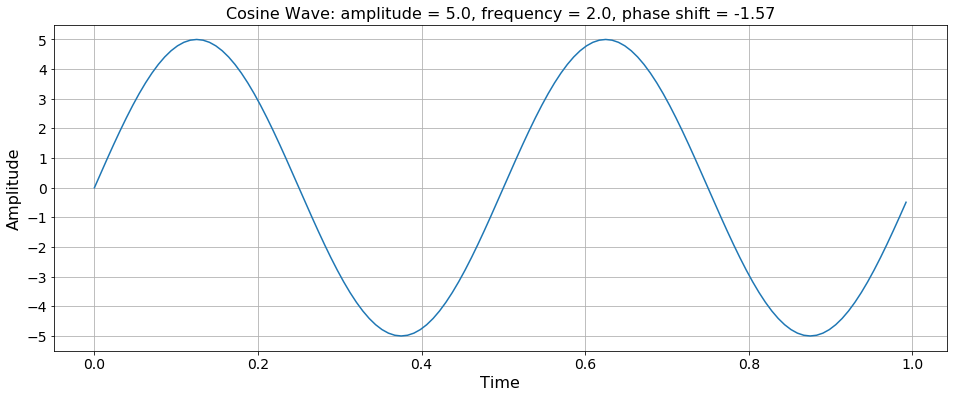

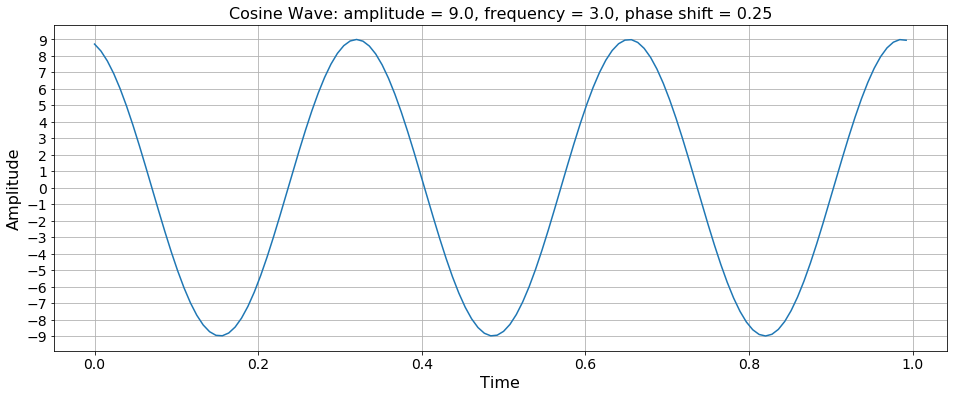

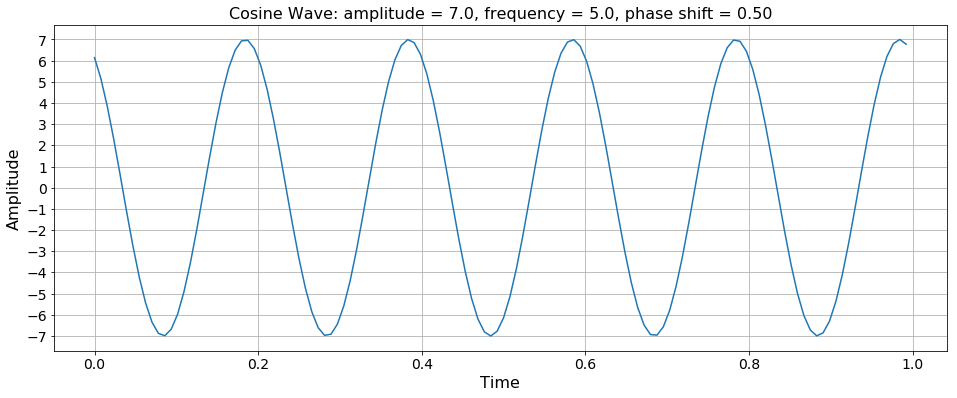

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 16 11:03:28 2019

@author: Paul Scheibal

This program shows the functionality of the Fast Fourier Transform.  Waves are generated
via a cosine wave and then combined.  FFT is then used to decompose the signals back
to their original amplitudes, frequeencies and phase shift.  Power Spectoral Desnity and 
Autocorrellation is performed as well.  These will be used for feature engineering

"""

import pandas as pd
import numpy as np

import os.path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pylab as plb
import matplotlib.mlab as mlab

from scipy.fftpack import fft,fftfreq,ifft,fftshift

from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

figsize(16,6)

def gen_wave(a, f, hps, vps, t):
    b = 2 * np.pi * f
    y = a * np.cos(b * t + hps) + vps
    fig, ax = plt.subplots()
    plt.plot(t,y)
    ttl = 'Cosine Wave: amplitude = %1.1f' % a
    ttl = ttl + ', frequency = %1.1f' % f
    ttl = ttl + ', phase shift = %1.2f' % hps
    plt.title(ttl, fontsize=16)
    plt.ylabel('Amplitude', fontsize=16)
    plt.xlabel('Time', fontsize=16)
    plt.yticks(np.arange(min(y),max(y)+1))
    plt.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(14)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)
    plt.show()
    return y
 
def calc_fft(y, samples, time):
    fft_vector = fft(y)
    fft_amp = 2.0/samples * np.abs(fft_vector[0:samples])
    fft_vector2 = fft_vector.copy()
    threshold = max(abs(fft_vector)/10000)
    fft_vector2[abs(fft_vector) < threshold] = 0
    fft_ps = np.angle(fft_vector2[0:samples])
    fft_psd = np.abs(fft_vector[0:samples]) ** 2
#    x = fft_vector[0:samples]
#    psd = (x.real ** 2 + x.imag **2)
#    amp = ( (np.sqrt(x.real ** 2 + x.imag **2)) ) * (2/samples)
#    x2 = fft_vector2[0:samples]
#    ps = np.arctan2(x2.imag,x2.real)
    freqarr = fftfreq(samples,time / samples)
    i = np.where(freqarr >= 0)
    samplefreqarr = freqarr[i]
    fft_psd = fft_psd[i]
    fft_amp = fft_amp[i]
    fft_ps = fft_ps[i]
    return fft_amp, fft_ps, fft_psd, samplefreqarr
 
def calc_autocorr(y, sample_interval, samples):
    autocorr_vector = np.correlate(y, y, mode='full')
    autocorr_vector = autocorr_vector[len(autocorr_vector)//2:]
    x_autocorr = np.array([sample_interval * i for i in range(0, len(autocorr_vector))])
    return x_autocorr, autocorr_vector

def plot_fft(x,y,ttl,xlab,ylab,plot_type,incr):
    fig, ax = plt.subplots()
    if plot_type == 'stem':
        plt.stem(x,y,markerfmt='C3o',linefmt='C0-')
    else:
        plt.plot(x, y, linestyle='-', color='C0')
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.title(ttl, fontsize=20)
    plt.xticks(np.arange(0,max(x)+incr,incr))
    plt.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(18)
    plt.show()
    return True

time = 1
samples = 128
sample_interval = time / samples
samples_per_sec = int(round(samples/time))
freq_high = int(samples_per_sec/2)

t = np.arange(0,time,sample_interval)
f = np.arange(0,freq_high,1/time)

phaseshift = -np.pi/2
frequency = 2
amplitude = 5
y1 = gen_wave(amplitude,frequency,phaseshift,0,t)
phaseshift = .25
frequency = 3
amplitude = 9
y2 = gen_wave(amplitude,frequency,phaseshift,0,t)
phaseshift = .5
frequency = 5
amplitude = 7
y3 =  gen_wave(amplitude,frequency,phaseshift,0,t)

Next, the following is the composite signal calculated by adding the three y values from the above signals.

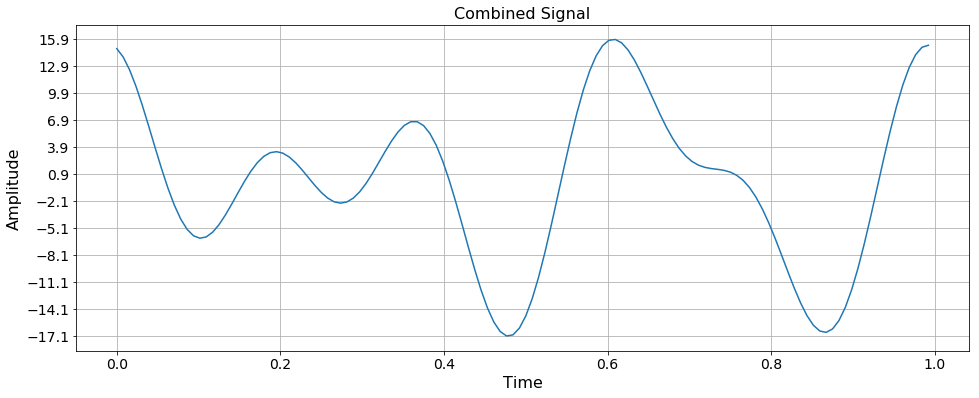

In [3]:
y = y1 + y2 + y3

fig, ax = plt.subplots()
plt.plot(t,y)
plt.title('Combined Signal', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.yticks(np.arange(min(y),max(y)+3, 3))
plt.grid(True)
for tick in ax.get_xticklabels():
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
plt.show()

Finally, the fft is called to create the frequency domain from the time domain.  The frequencies, amplitudes, phase shifts are recovered. 

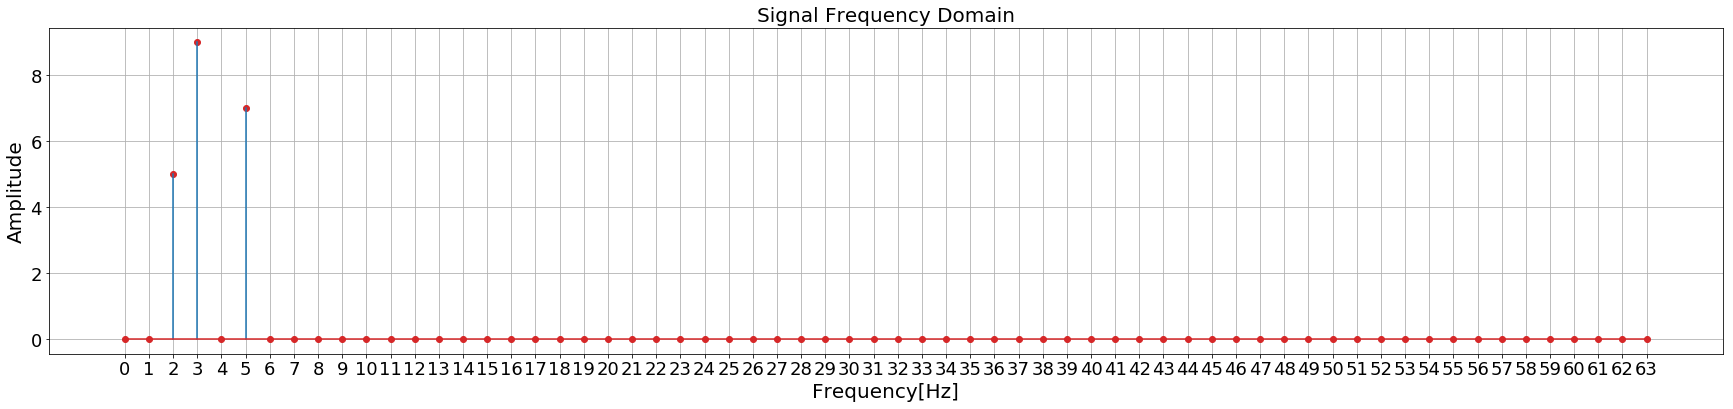

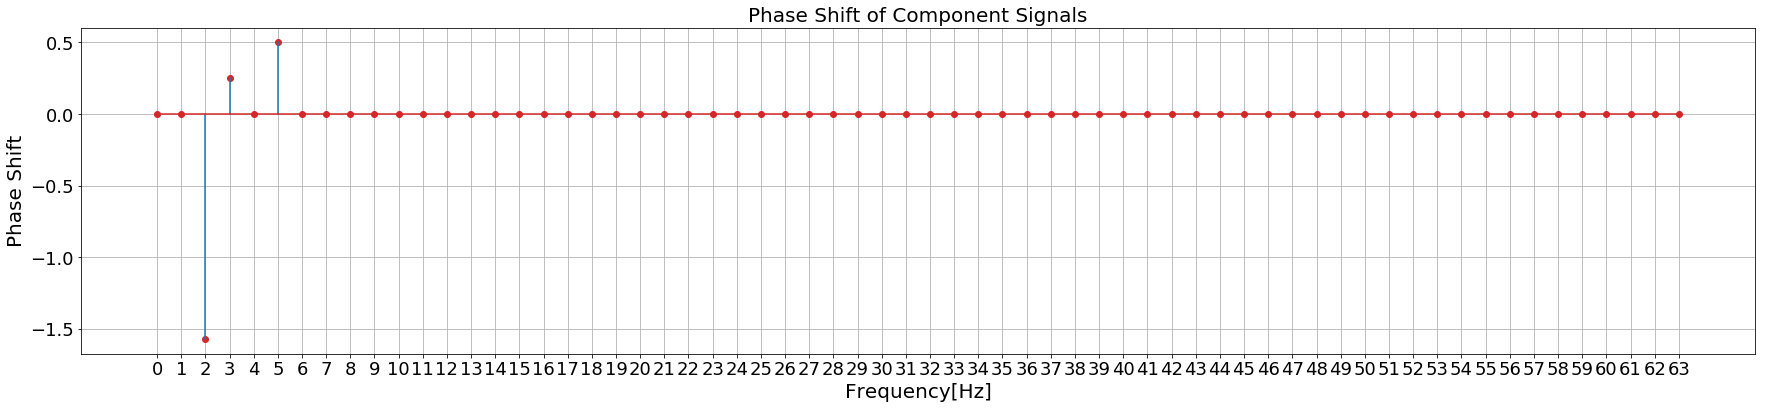

True

In [4]:
amp_vector, phase_vector, psd_vector, samplefreqarr = calc_fft(y,samples,time)

figsize(30,6)
plot_fft(samplefreqarr, amp_vector,'Signal Frequency Domain','Frequency[Hz]','Amplitude','stem',1)

plot_fft(samplefreqarr, phase_vector,'Phase Shift of Component Signals','Frequency[Hz]','Phase Shift','stem',1)


The purpose of using fft is to extract information about a signal and use it as features to machine learning classification.  To do this the Power Spectral Density and Autocorrelation of Signal will be used.

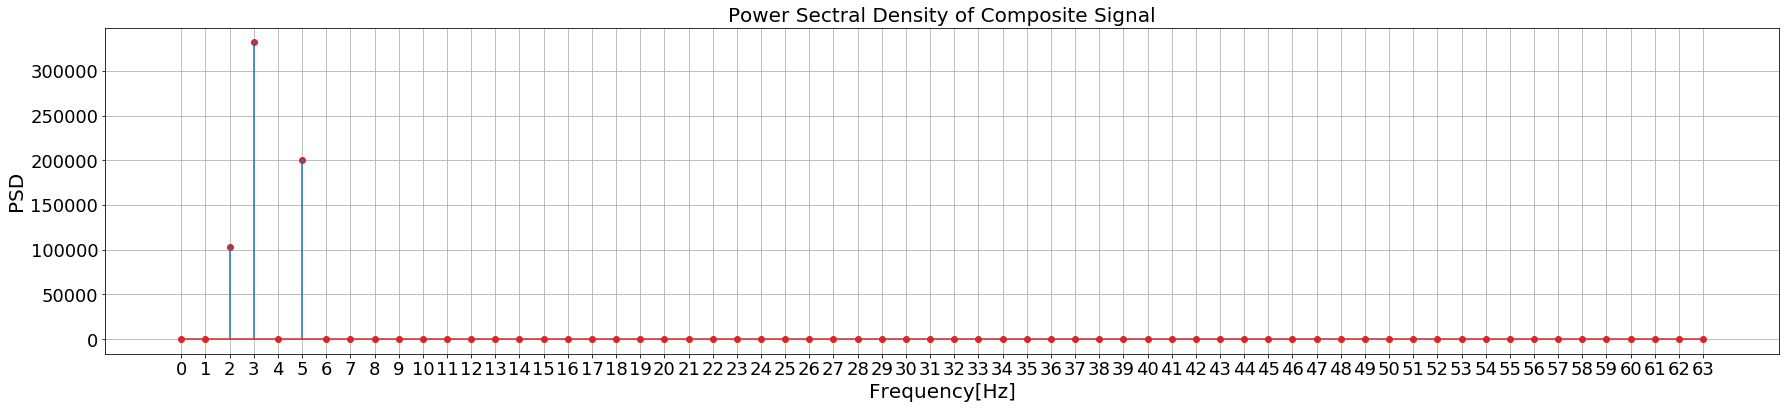

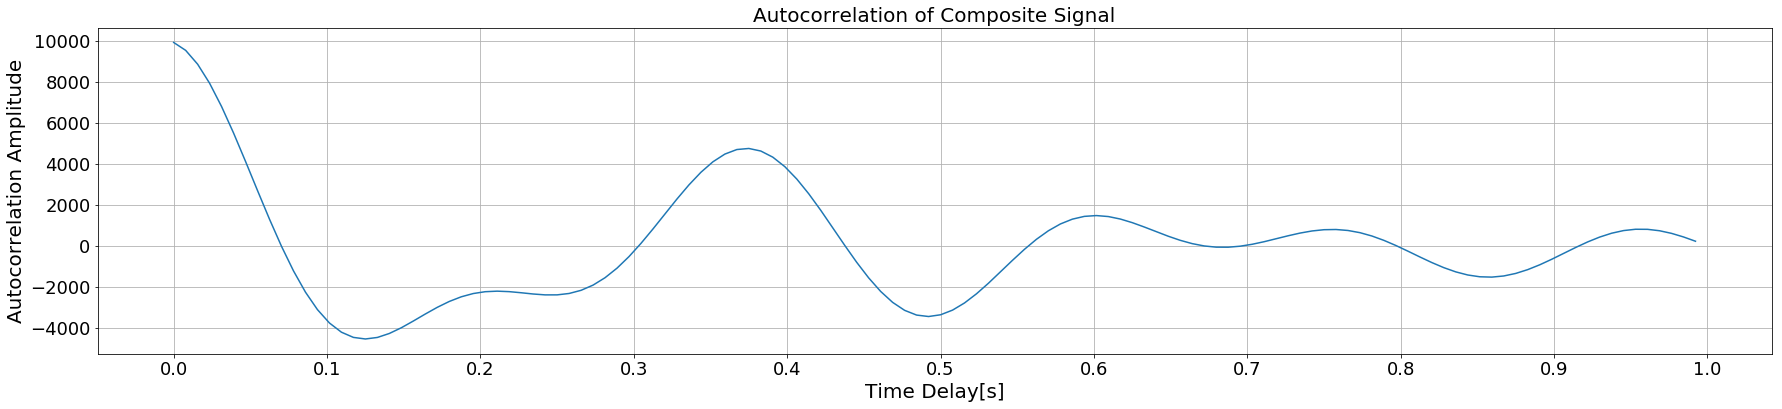

True

In [5]:
plot_fft(samplefreqarr, psd_vector,'Power Sectral Density of Composite Signal','Frequency[Hz]','PSD','stem',1)

t_values, autocorr_vector = calc_autocorr(y, sample_interval, samples)
plot_fft(t_values, autocorr_vector,'Autocorrelation of Composite Signal','Time Delay[s]','Autocorrelation Amplitude','plot',0.1)


# Discrete Wavlet Transform

### Fast Fourier Transform Discussion

Fast Fourier Transform (FFT) works well with the above example as the signal repeats itself periodically over and over.  Time really doesn't matter in this case.  The result of the FFT is high resolution in the frequency domain and no resollution in the time domain.  For signals that have frequencies that vary over time such as "chirp" signals, FFT does not perform well. FFT cannot represent abrupt changes in frequencies with respect to time.  The following is a chirp signal: ![title](img/Chirp.GIF)

### Discrete Wavelet Transform Explained

The Discrete Wavelet Transform (DWT) has high resolution in the frequency and time domains.  For ever changing frequencies with respect to time DWT does well.  DWT is used for noise reduction of signals and data compression.  Signals typcially consist of slowly changing waves with abrupt short term changes to the waves. It is the abrupt changes that are of specific interest to machine learning as it provides a blueprint of the behavior of the signal at that time.  To find these abrupt changes, DWT uses wavelets.  Wavelets exist only for a finite duration and come in different shapes.  Choosing the right wavelet is important, and the best way choose a wavelet is by trial and error.  For this project, the "sym2" worked well.  below is a subset of the sym family of wavelets.
![title](img/symwavlets.GIF)

The following code lists the discrete families of wavelets along with the set of wavelets in each family.


In [1]:
import pywt

famlst = pywt.families()
print(famlst)
for f in famlst:
    print(pywt.wavelist(family=f,kind='discrete'))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['haar']
['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbi

### Scaling and Shifting

Scaling allows a wavelet of conform to the low frequency sigals and to the high frequency signals by allowing the wavelet to strech or compress as it moves in time across the signal. The scale factor is inversely proportional to the frequency. For example scaling a sine wave by two by 2 reducing the frequency by half.  A larger scale factors result in lower frequencies while smaller scale factors result in higher frequencies.

Shifting means moving the wavelet along the signal path.  Concept is to shift the wavelet along the signal in order to pick up the attributes of the signal.

### Filter Banks

DWT compares the signal to multi-rate filter banks.  The following diagram represents the process. ![title](img/dwtfilterbanks.GIF)

The following implements a noise reduction using DWT.  Generate 5 waves.


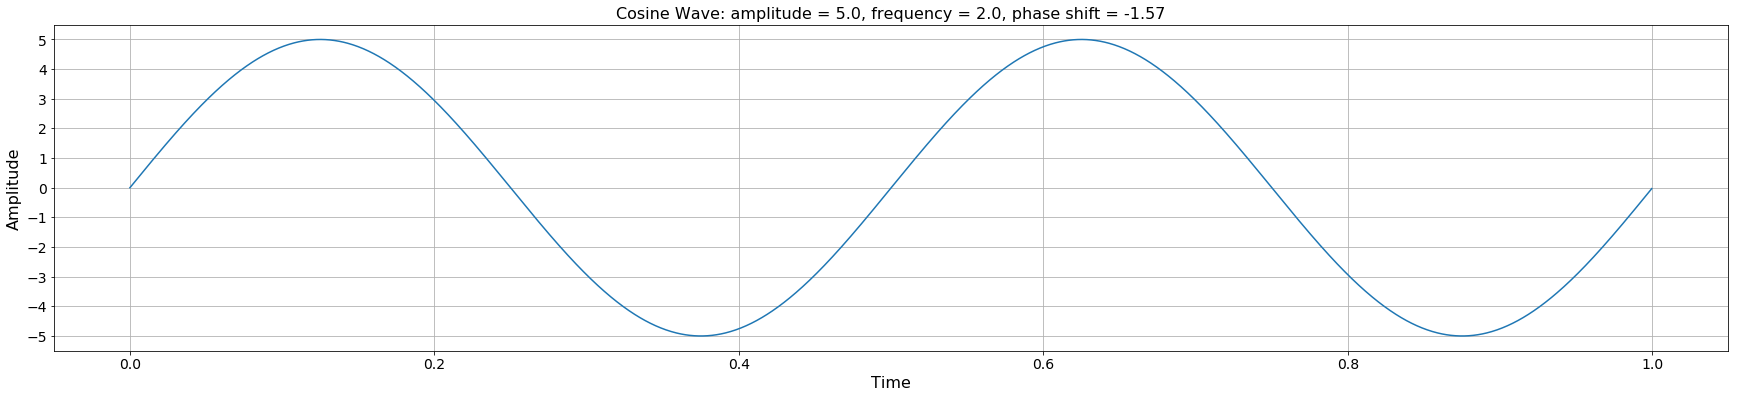

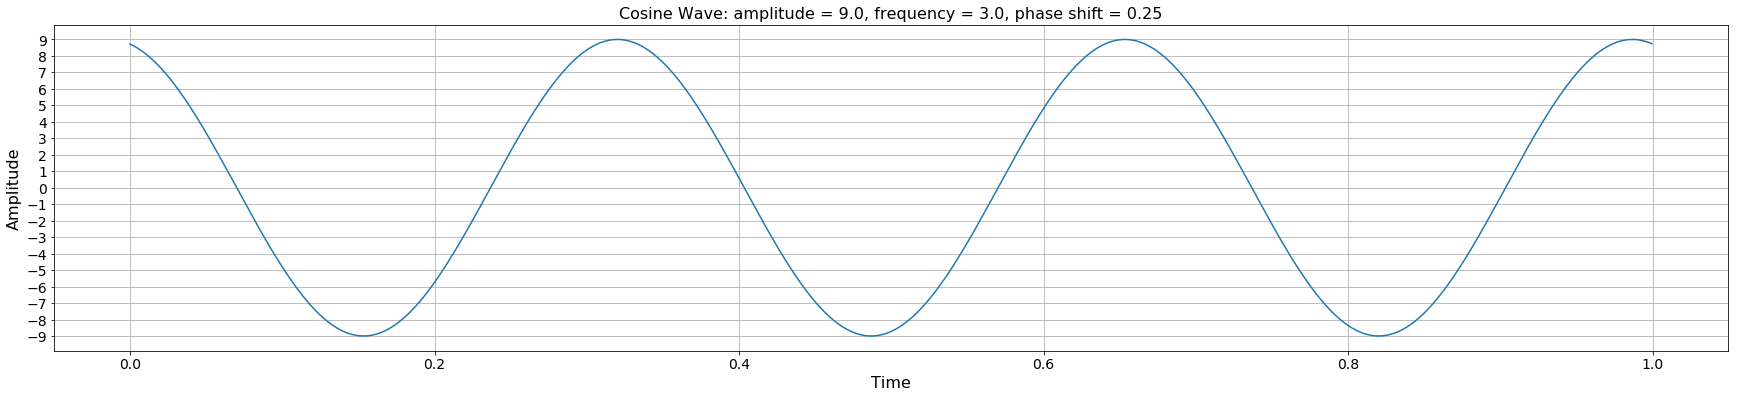

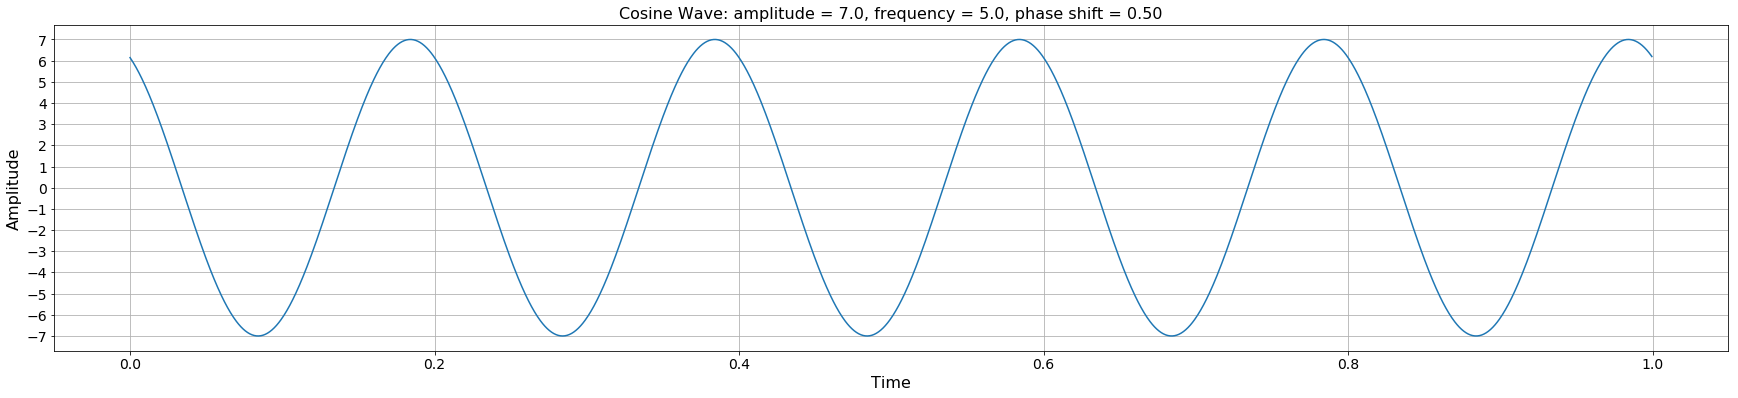

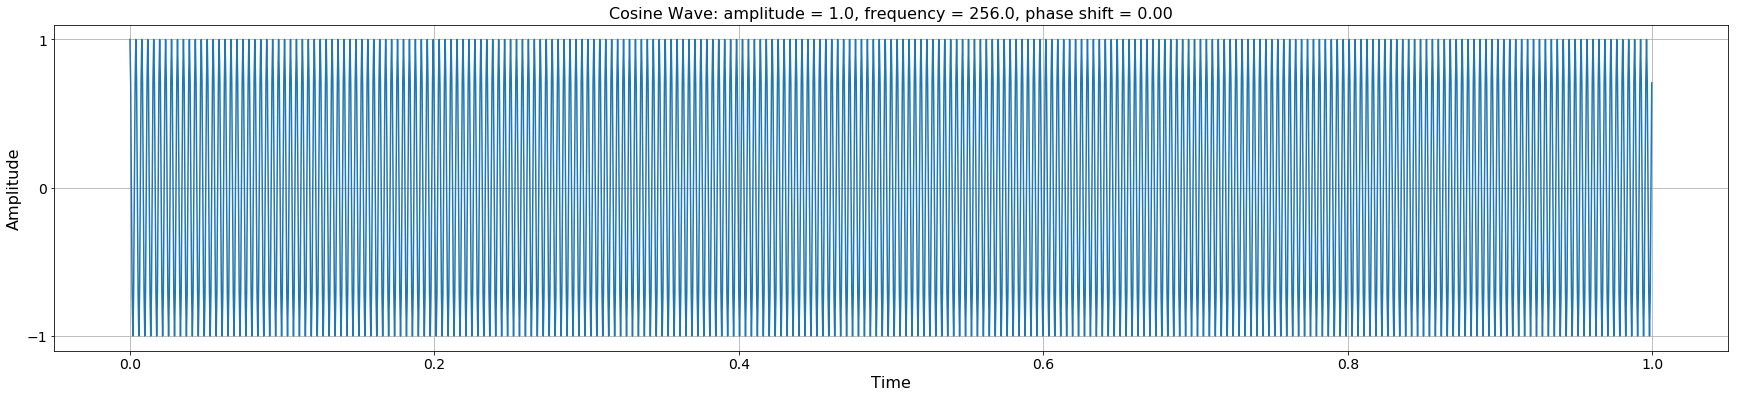

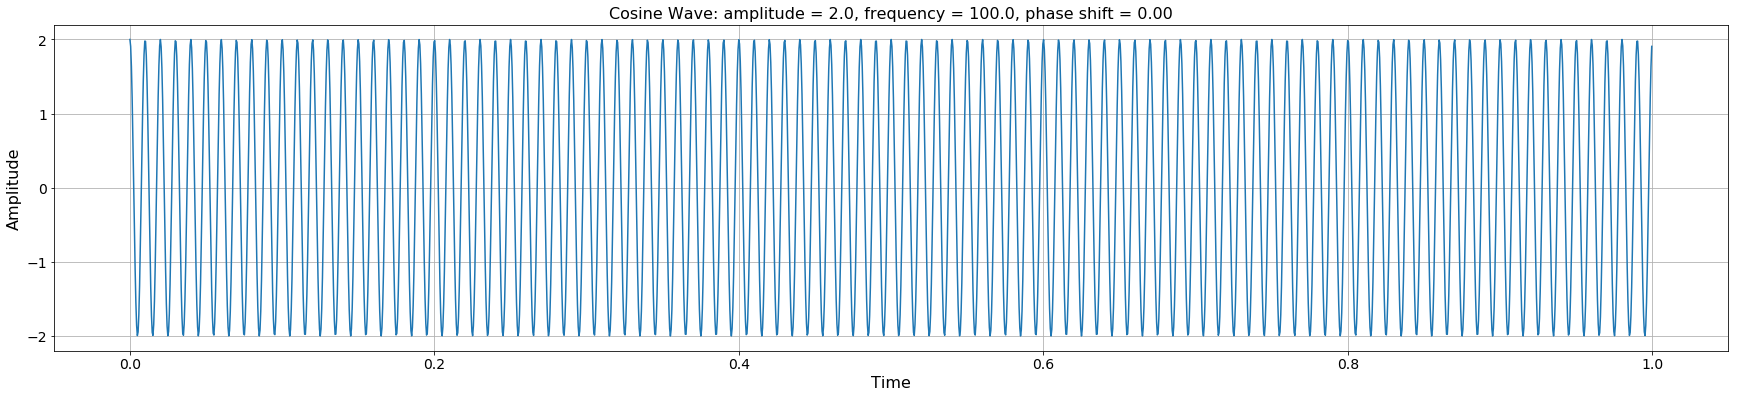

In [7]:
time = 1
samples = 2048
sample_interval = time / samples
samples_per_sec = int(round(samples/time))
freq_high = int(samples_per_sec/2)

t = np.arange(0,time,sample_interval)
f = np.arange(0,freq_high,1/time)

# create a series of waves
# low frequency
phaseshift = -np.pi/2
frequency = 2
amplitude = 5
y1 = gen_wave(amplitude,frequency,phaseshift,0,t)
# low frequency
phaseshift = .25
frequency = 3
amplitude = 9
y2 = gen_wave(amplitude,frequency,phaseshift,0,t)
# low frequency
phaseshift = .5
frequency = 5
amplitude = 7
y3 =  gen_wave(amplitude,frequency,phaseshift,0,t)
# high frequency noise
phaseshift = 0
frequency = 256
amplitude = 1
y4 =  gen_wave(amplitude,frequency,phaseshift,0,t)
phaseshift = 0
frequency = 100
amplitude = 2
# high frequency noise
y5 =  gen_wave(amplitude,frequency,phaseshift,0,t)

Put them all together to form one composite signal.

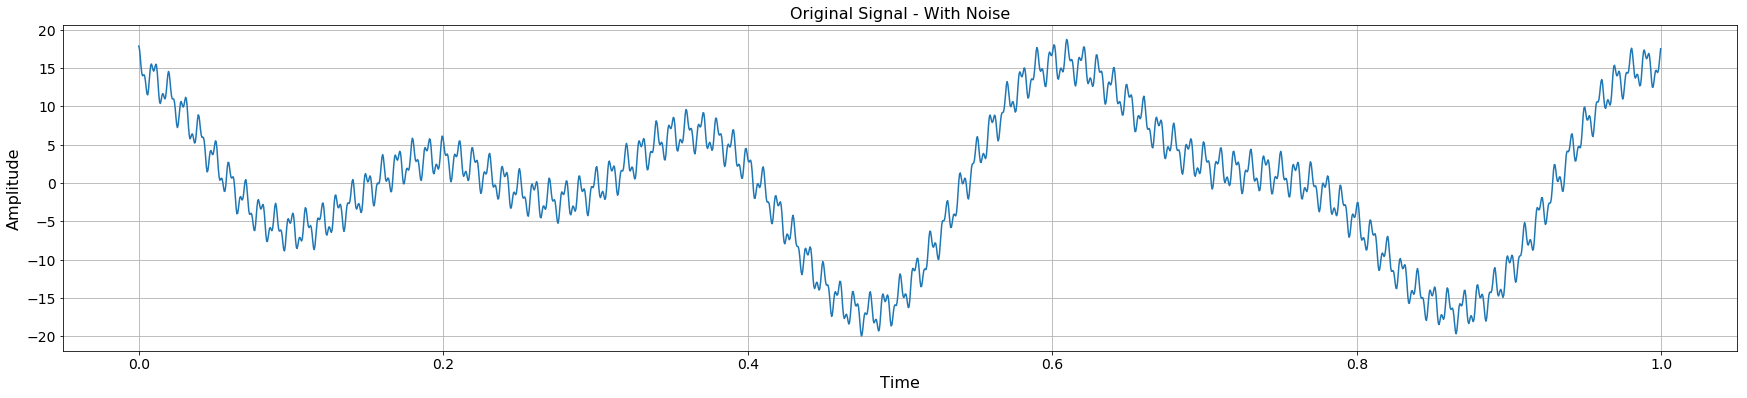

In [8]:
# put them all together to form one consolidated wave
y = y1 + y2 + y3 + y4 + y5
# plot combined signal
fig, ax = plt.subplots()
plt.plot(t,y)
plt.title('Original Signal - With Noise', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.grid(True)
for tick in ax.get_xticklabels():
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
plt.show()


Run DWT and plot reduced noise wave.

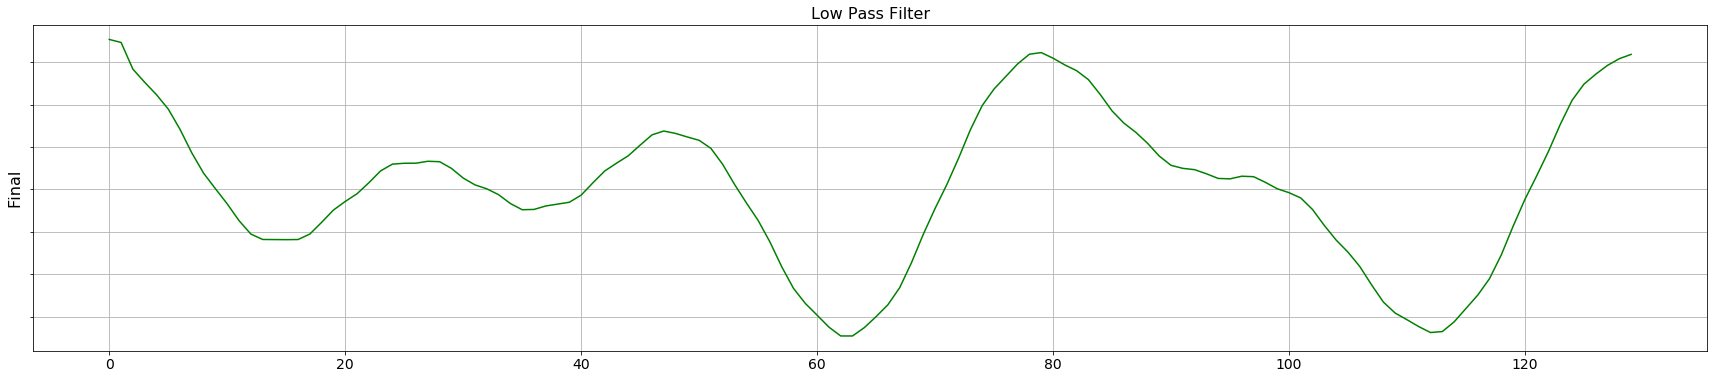

In [9]:
# set wavelet name
waveletname = 'sym2' 
coef= pywt.wavedec(y,waveletname,level=4)

fig, ax = plt.subplots()
plt.plot(coef[0],color='green')
plt.title('Low Pass Filter', fontsize=16)
plt.ylabel('Final', fontsize=16)
ax.set_yticklabels([])
plt.grid(True)
for tick in ax.get_xticklabels():
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
plt.show()

Here is the high pass level information.

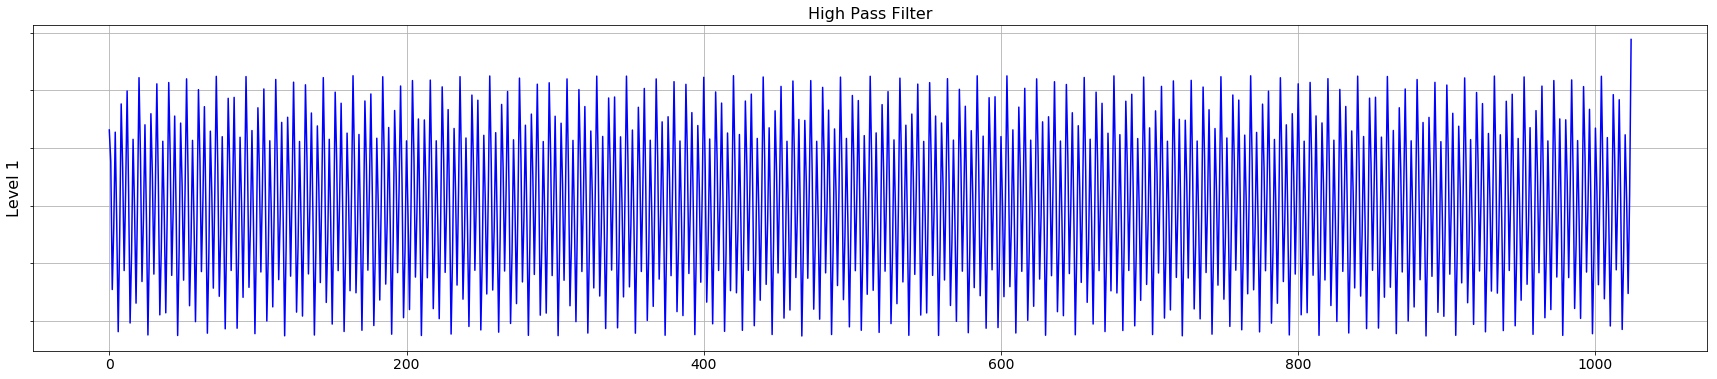

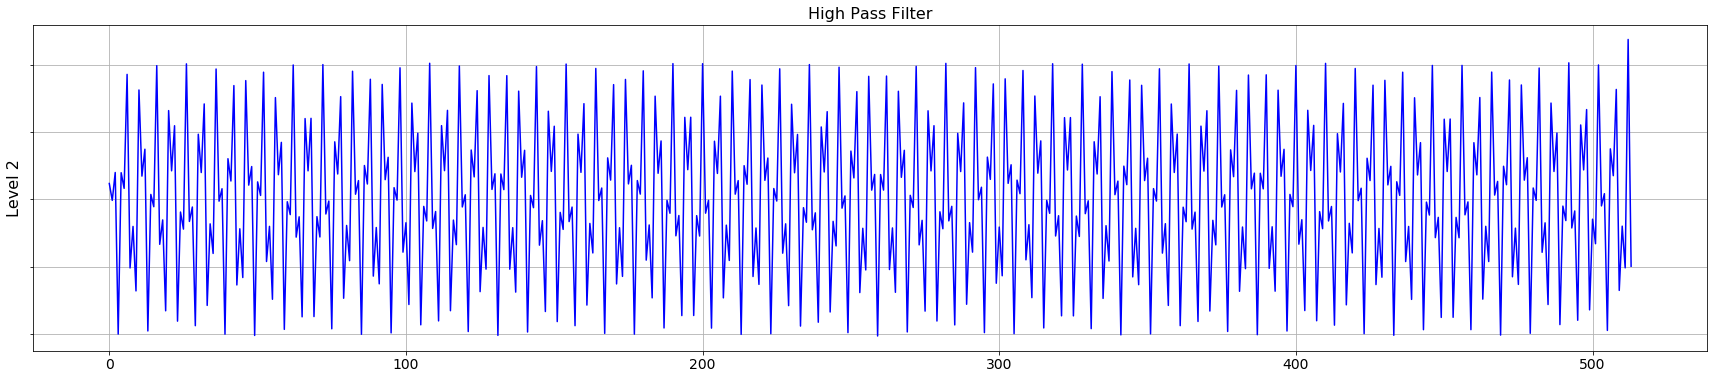

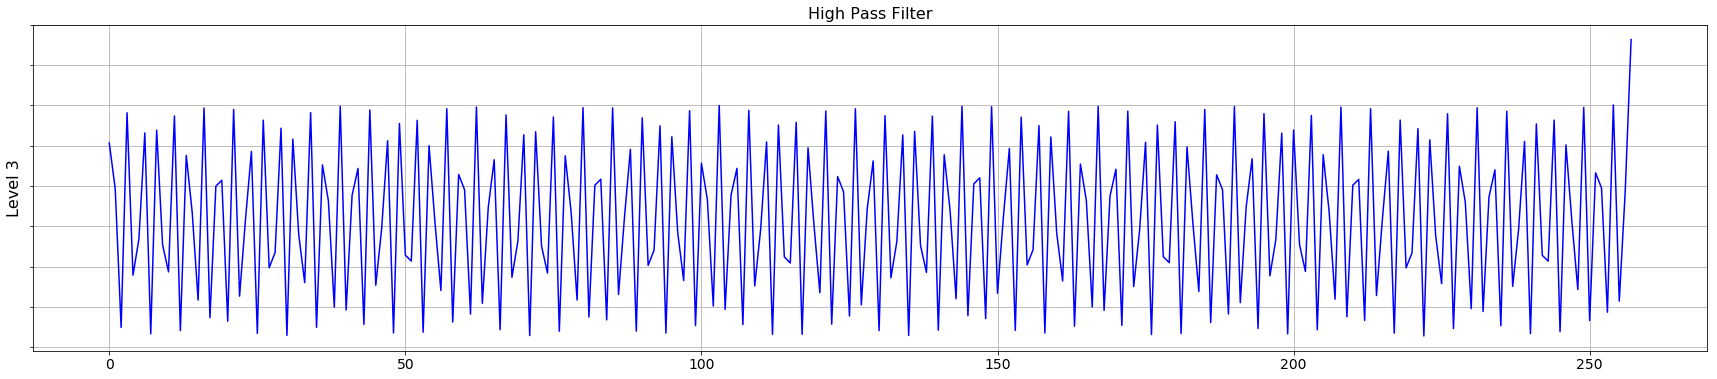

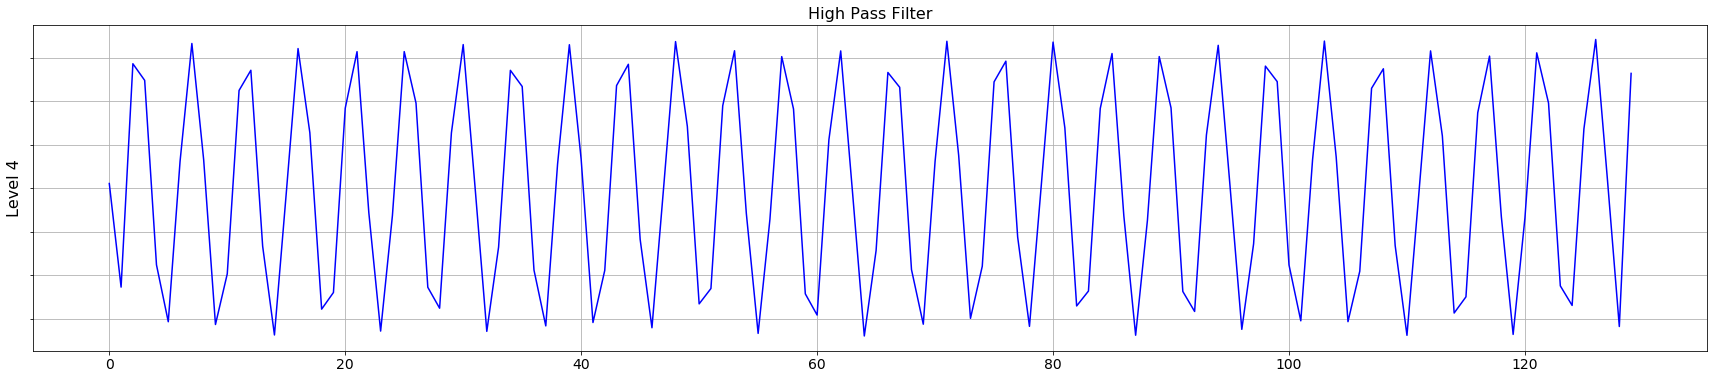

In [10]:
for i in range(1,len(coef)):
    fig, ax = plt.subplots()
    j = len(coef) - i 
    plt.plot(coef[j],color='blue')
    plt.title('High Pass Filter', fontsize=16)
    plt.ylabel('Level ' + str(i), fontsize=16)
    ax.set_yticklabels([])
    plt.grid(True)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(14)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)
    plt.show()

# Conclusion

Why is FFT and DWT so important.  Because their outputs contain a wealth of information about the original signal. This information can be translated into features to be input into machine learning classification models.  And that's exactly what is going to happen next.